In [1]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('dataset//Chicago_Crimes.csv')

df

In [3]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h2>Cleaning Null Values

In [4]:
df['Date'] = df['Date'].astype('str')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors = 'coerce')

In [5]:
df['Location Description'] = df['Location Description'].fillna('unaccounted_location_description')
df['Community Area'] = df['Community Area'].fillna('unaccounted_community_area')
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].mode()[0])
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].mode()[0])
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Location'] = df['Location'].fillna('unaccounted_location')

In [6]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayofWeek'] = df['Date'].dt.day_name()


In [7]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
Hour                    0
DayofWeek               0
dtype: int64

<h2>Description Analysis

<h3>Which of these community has the most number of crimes?

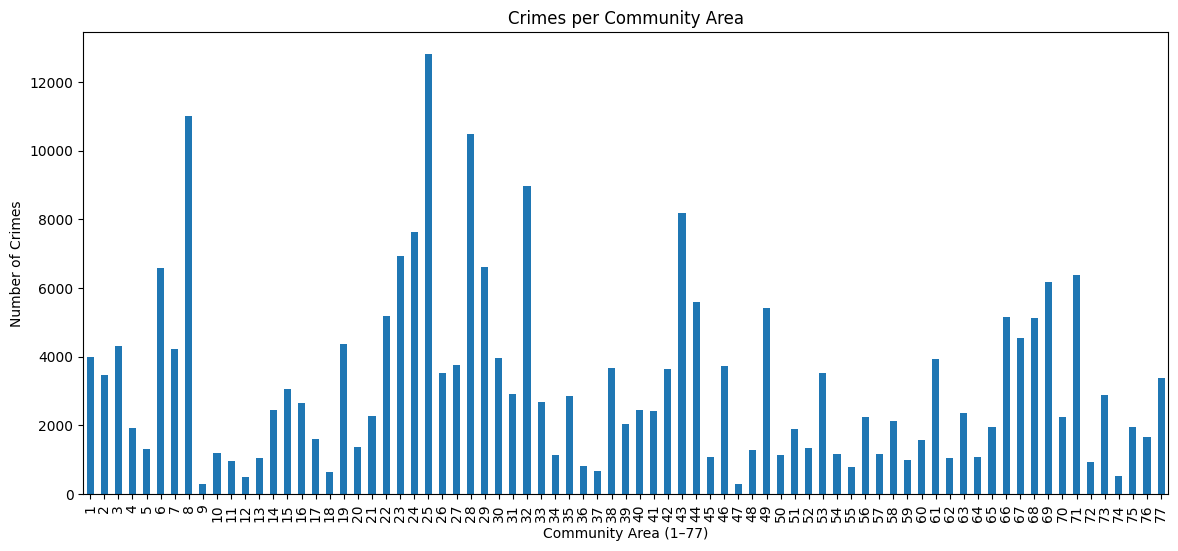

In [8]:
# Convert Community Area to numeric safely
df["Community Area"] = pd.to_numeric(df["Community Area"], errors="coerce").astype("Int64")
crimes_per_comm = df.groupby("Community Area").size().sort_index()
crimes_per_comm.plot(kind="bar", figsize=(14,6))
plt.title("Crimes per Community Area")
plt.xlabel("Community Area (1–77)")
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insight#1
<h3>The community with the most crimes is Community Area 25  followed by Community Area 8 and Community Area 28 

<h2>What is the most common crime type in Community Area 25?

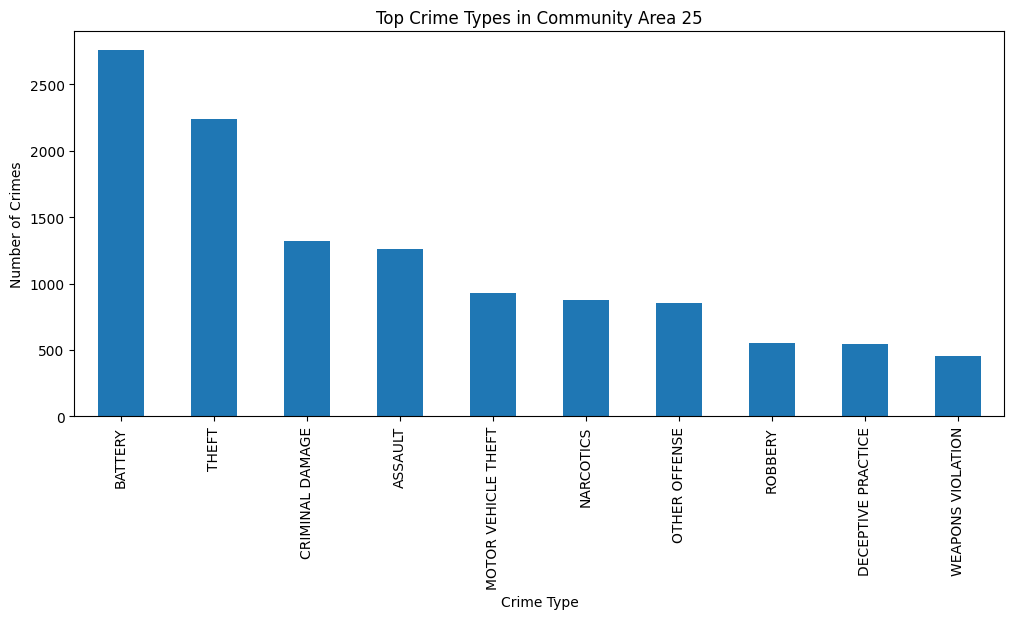

In [9]:
comm25_crimes = df[df["Community Area"] == 25]
comm25_primary = comm25_crimes["Primary Type"].value_counts()
comm25_primary.head(10).plot(kind="bar", figsize=(12,5))
plt.title("Top Crime Types in Community Area 25")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insight#2 
<h3>Battery had a whopping 2500+ on numbers

<h2>Insight#3 
<h3>Theft had a 2000+ of Crimes in Community 25

<h2>Which year had the most crimes in Community 25?

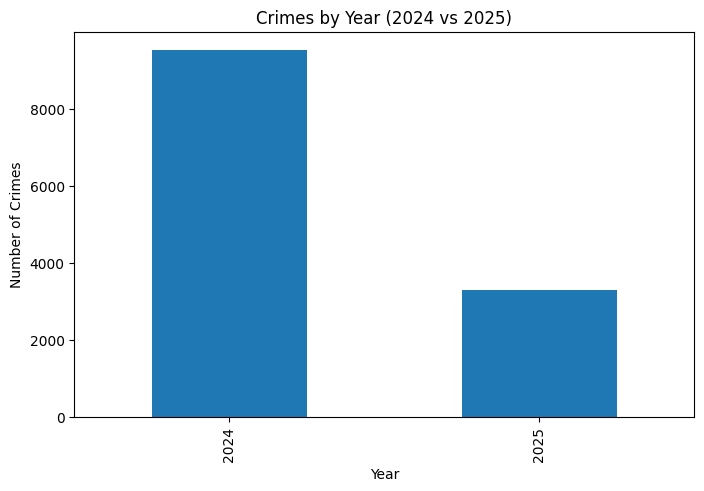

In [10]:
comm25_crimes["Year"].value_counts().sort_index().plot(kind="bar", figsize=(8,5))
plt.title("Crimes by Year (2024 vs 2025)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insight#4
<h3>1.The analysis shows the highest number of recorded crimes.

<h2>Insights#5
<h3>2.While 2024 recorded the Highest, 2025 is already showing a Similar Counts of Crimes but alot more lowered but still quite high

<h2>What is the most common crime type in Community Area 8

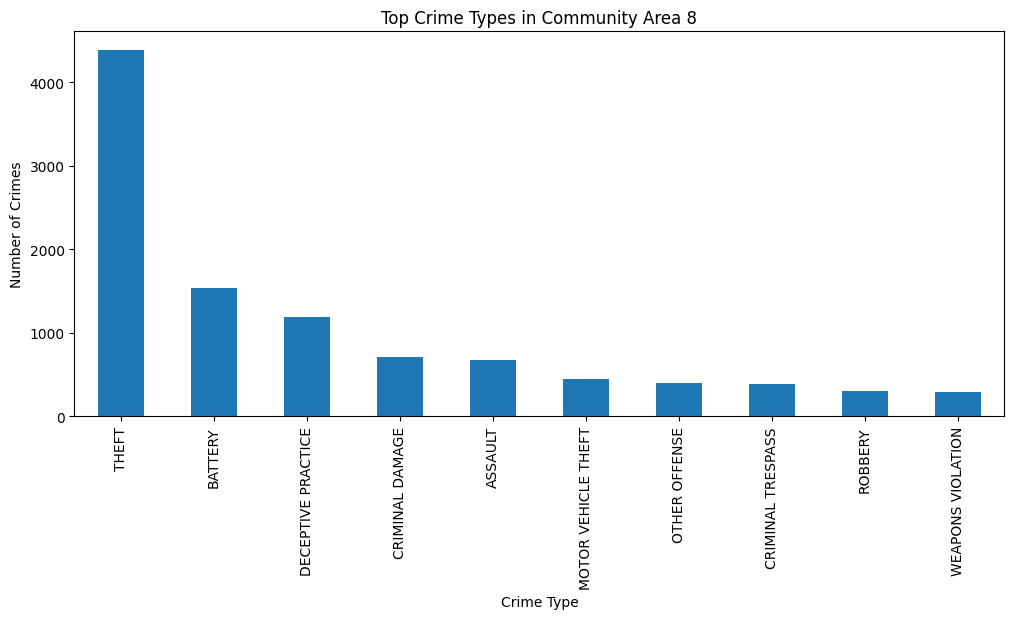

In [11]:
comm8_crimes = df[df["Community Area"] == 8]
comm8_primary = comm8_crimes["Primary Type"].value_counts()
comm8_primary.head(10).plot(kind="bar", figsize=(12,5))
plt.title("Top Crime Types in Community Area 8")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insights#6
<h3>Theft has the Number of 4000+ in Theft Crimes in Community Area 8
<h2>Insights#7
<h3>Battery Crimes is alot more lowered than Theft but higher than Deceptive Practive

<h2>Which year had the most crimes in Community 25?

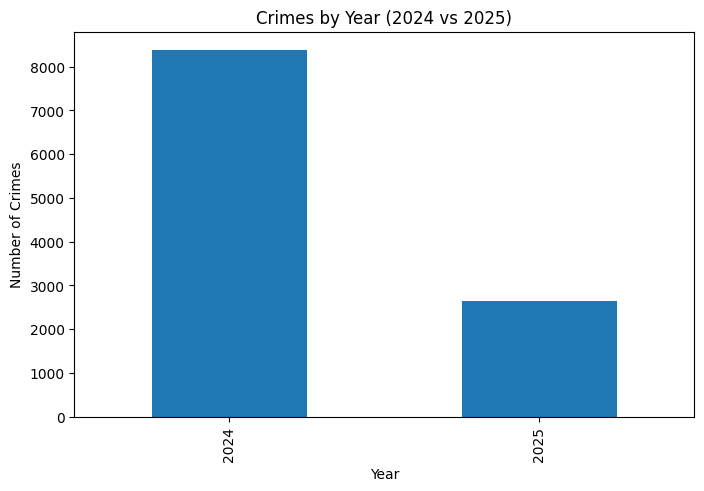

In [12]:
comm8_crimes["Year"].value_counts().sort_index().plot(kind="bar", figsize=(8,5))
plt.title("Crimes by Year (2024 vs 2025)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insight#8
<h3>1.Year 2024 in Community area 8 had a whopping 8000+ Number of Crimes
<h2>Insight#9
<h3>1.Year 2025 had its Crime Rate Could be due to Police improving Efforts to reduce crime but none the less crime rate is still at 2500+

<h2>What month has the most crimes in Community Area 8

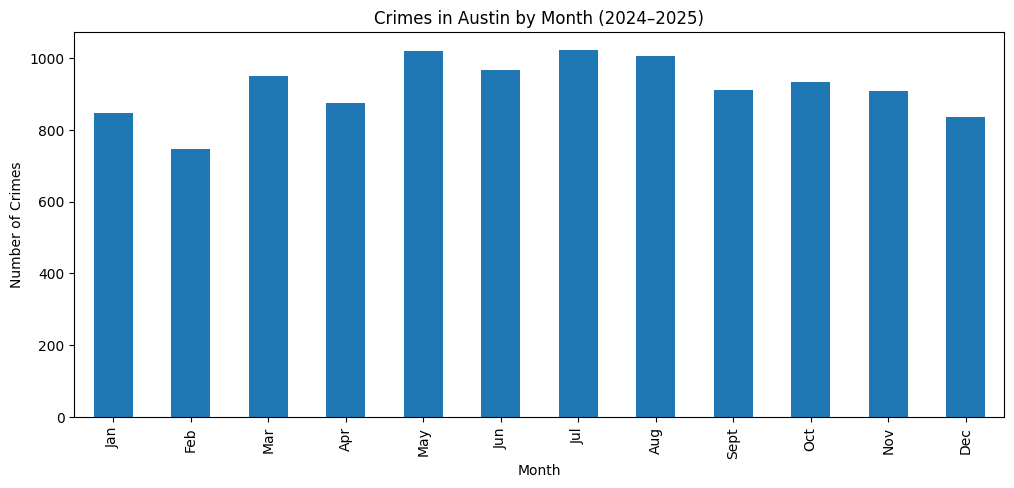

In [13]:
comm8_crimes["Month"] = pd.to_datetime(comm8_crimes["Date"]).dt.month
comm8_crimes["Month"].value_counts().sort_index().plot(kind="bar", figsize=(12,5))
plt.title("Crimes in Austin by Month (2024–2025)")
plt.xlabel("Month")
plt.xticks(range(0,12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insight#10
<h3>Both may and july had almost to equal Crime rates on those Months than other months
<h2>Insight#11
<h3>Month of february had the lowest number of Crime rates in Community Area 8 even so its at 660+

<h2>What is the most common crime location Community Area 8?

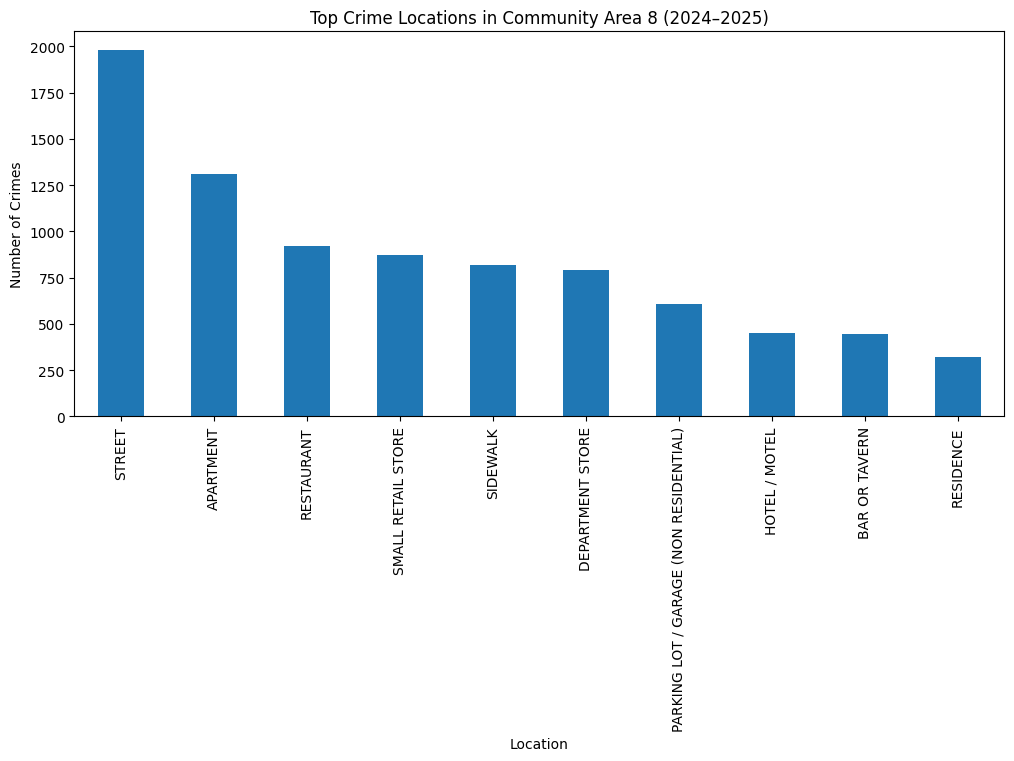

In [14]:
comm8_crimes["Location Description"].value_counts().head(10).plot(kind="bar", figsize=(12,5))
plt.title("Top Crime Locations in Community Area 8 (2024–2025)")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.show()

<h2>Insight#12
<h3>Street Type of Crimes in Community Area 8 was quite the highest reaching 1900+
<h2>Insight#13
<h3>Crimes in Apartments in Community Area 8 are alot less than in Streets but its still a number to be of concerned
<h2>Insight#14
<h3>Lowest Crime Rates is in the Residence of Community Area 8 being 250+ but don't be willy nilly about it you still need to be careful

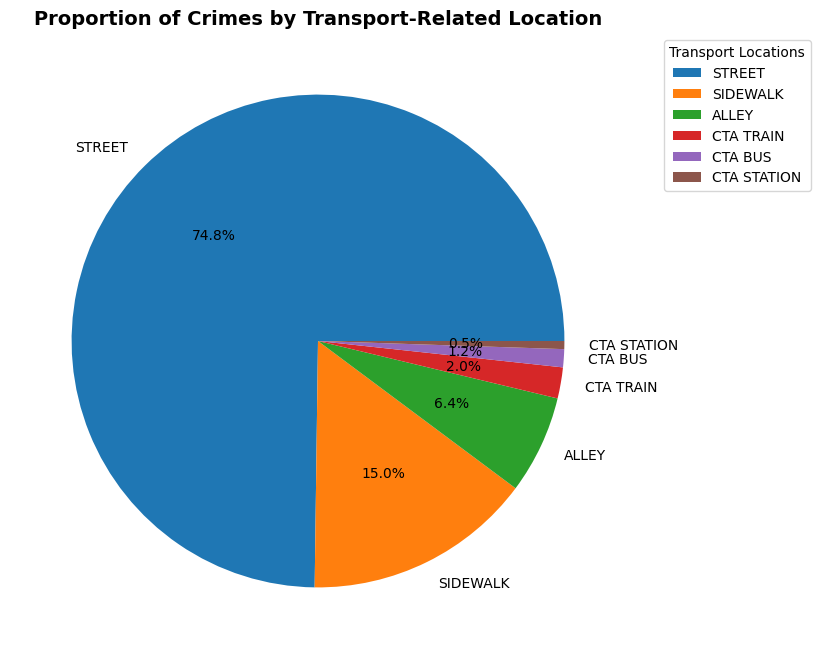

In [26]:
transport_locs = ["STREET", "SIDEWALK", "ALLEY", "CTA STATION", "CTA TRAIN", "CTA BUS"]
transport_df = df[df['Location Description'].isin(transport_locs)]

location_counts = transport_df['Location Description'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%')
plt.title("Proportion of Crimes by Transport-Related Location", fontsize=14, weight="bold")
plt.legend(location_counts.index, title="Transport Locations", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<h2>Insight#15
<h3>Theres atleast 74.8% of rate of crimes due to the streets being the easiest 
<h2>Insight#16
<h3>The Sidewalks has 15.0% its alot lowered than of the streets but its still to be concerned 
<h2>Insight#17
<h3>Alleyways has 6.4% of Crime rate these places mostly provide a perfect place for some criminals but its not the case here 
<h2>Insight#18
<h3>In CTA Trains they Provide easiests ways for criminals to escape at the same time has tons of CCTV's and crime rate is relatively low on the case as this
<h2>Insight#19
<h3>CTA Station has the lowest Crime rates

<h2>Crime at Transport Places

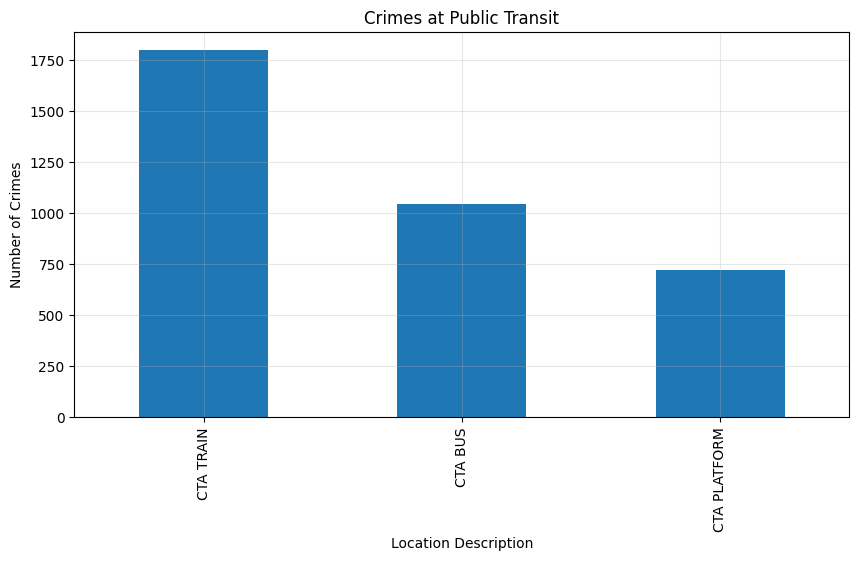

In [17]:
df[df['Location Description'].isin(['CTA TRAIN','CTA PLATFORM','CTA BUS'])]['Location Description'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Crimes at Public Transit")
plt.ylabel("Number of Crimes")
plt.grid(alpha=0.3)
plt.show()

<h2>Insights#20
<h3>On CTA Trains it has the most Crimes to happen than any of the three
<h2>Insights#21
<h3>At CTA Platforms has the lowest crimes that had happen

<h2>What is the Homicide percentages by the year 2024 and 2025

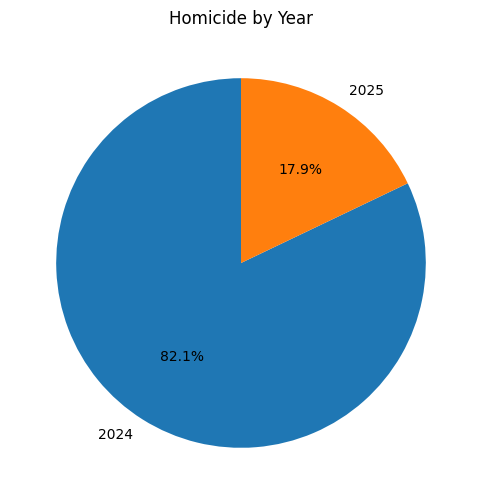

In [19]:
homicide_counts = df[df['Primary Type'] == 'HOMICIDE'].groupby('Year').size()

plt.figure(figsize=(8,6))
plt.pie(homicide_counts, labels=homicide_counts.index, autopct='%1.1f%%',startangle=90,)
plt.title("Homicide by Year")
plt.show()

<h2>Insights#22
<h3>Year 2024 has the highest Homicide Percentage of that happened
<h2>Insights#23
<h3>Year 2025 has much of less Percentage than of 2024 but its still to be of concerned

<h2>Places of communities have the high

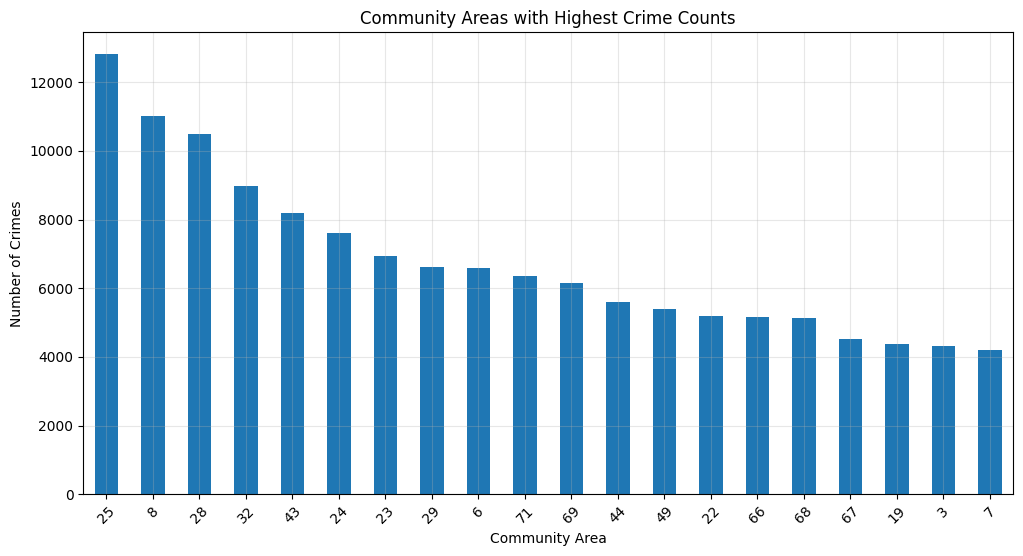

In [21]:
location_counts = df['Community Area'].value_counts().head(20)

location_counts.plot(kind='bar', figsize=(12,6))
plt.title("Community Areas with Highest Crime Counts")
plt.ylabel("Number of Crimes")
plt.xlabel("Community Area")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


<h2>Insights#24
<h3>Like what i analysed Community Area 25 has the highest Crimes reaching 12000+
<h2>Insights#25
<h3>The Second to be highest alongside of Community Area 25 is Community Area 8
<h2>Insights#26
<h3>Community Area 7 has the lowest here of the 20 i've listed being of 4000 but still nonetheless high

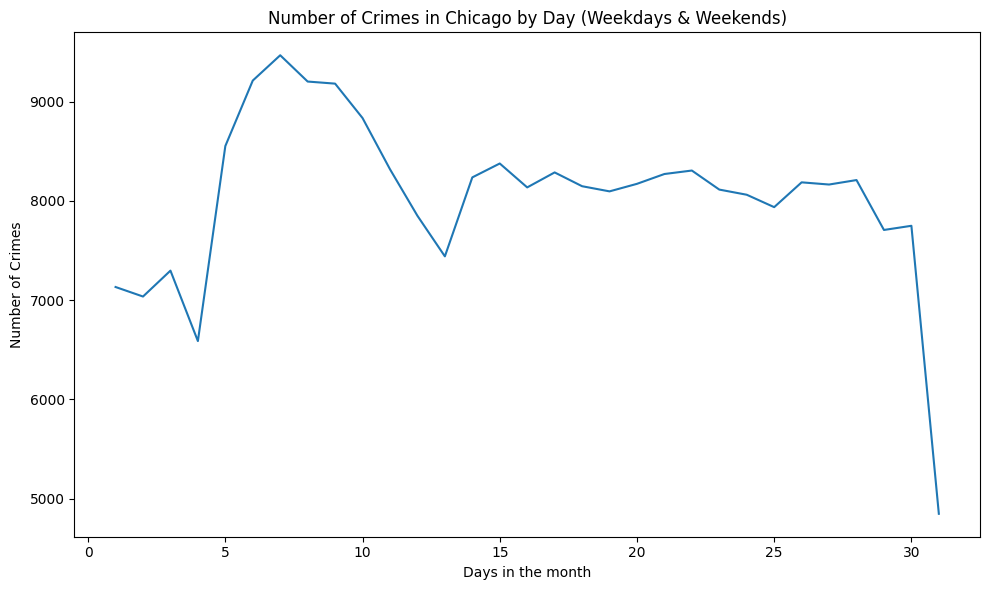

In [34]:
crimes_each_day = df['Day'].value_counts().sort_index()
crimes_each_day.plot(kind="line", figsize=(10, 6))

plt.title("Number of Crimes in Chicago by Day (Weekdays & Weekends)")
plt.xlabel("Days in the month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<h2>Insight#27
<h3>one of the highest one is 7 in the month
<h2>Insight#28
<h3>Along side is 6 the Second highest and theres another and its 9
<h2>Insight#29
<h3>The lowest of all is 31 being at 4000+

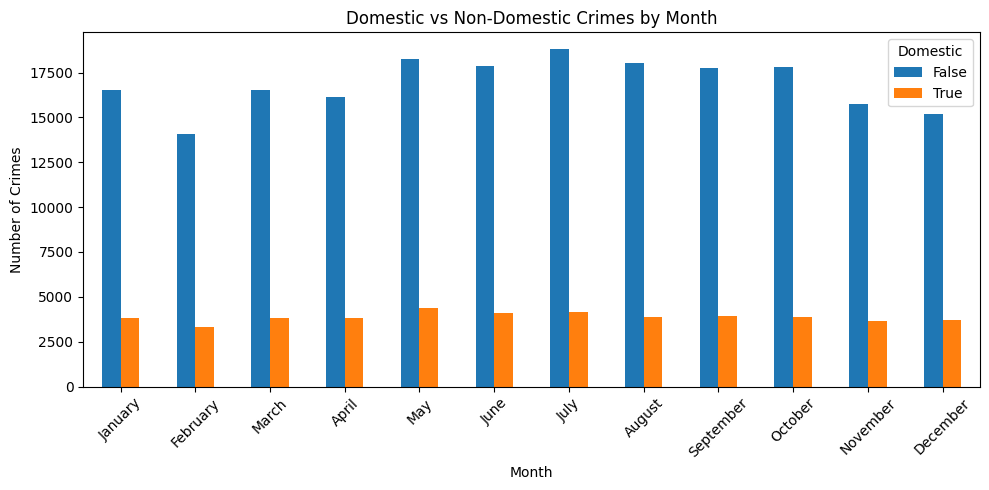

In [35]:
month_dom = df.groupby(['Month', 'Domestic']).size().unstack()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
month_dom.index = month_dom.index.map(month_names)

month_dom.plot(kind='bar', figsize=(10, 5))
plt.title('Domestic vs Non-Domestic Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>Insight#30
<h3>The Month of July Has the reach of 17000 Non-Domestic Crimes and Domestic is at 3000+ highest of all listed on non-domestic
<h2>Insight#31
<h3>Month of May its the second highest on non domestic due to some occassions and domestic at 3100+ this is the highest on Domestic Crime than all
<h2>Insight#32
<h3>Lowest of all is February on both Domestic and Non Domestic This decline may be influenced by a return to pre-pandemic social normalcy

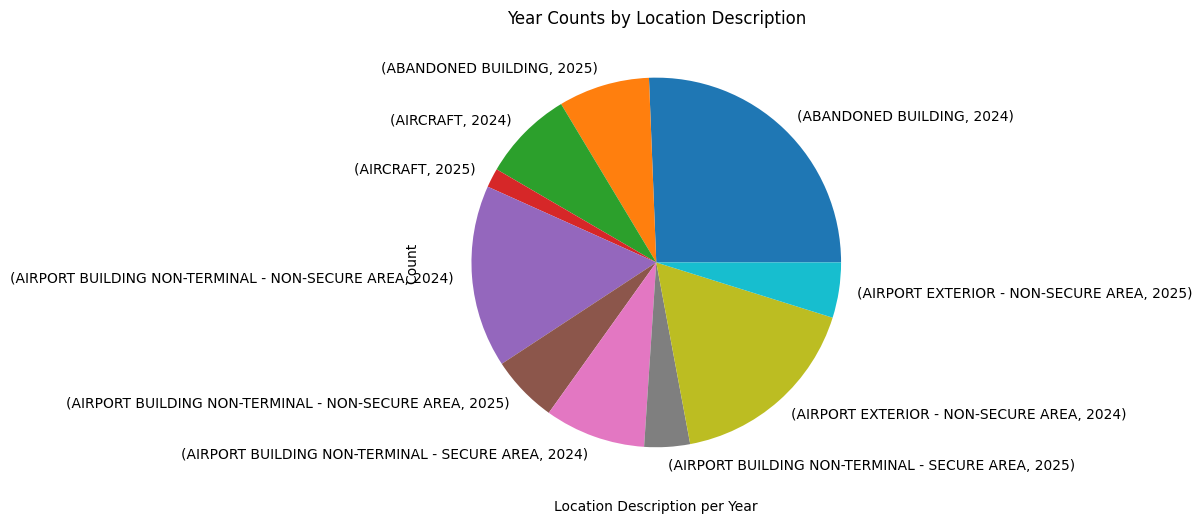

In [41]:
x = df.groupby(['Location Description'])['Year'].value_counts().head(10)
x.plot(kind='pie', figsize=(12, 6))
plt.title('Year Counts by Location Description')
plt.xlabel('Location Description per Year')
plt.ylabel('Count')
plt.show()

<h2>Insights#33
<h3>Crimes in Locations of abandoned Buildings have been high in 2024
<h2>Insights#34
<h3>Second to be at high reach is at Airport outside that are Not secured
<h2>Insights#35
<h3>Aircraft Crimes are at of lowest of factor due to Criminals not being able to escape during the flight and landing places are limited causing it to be low but still there are still crimes in aircrafts